<a href="https://colab.research.google.com/github/Calebmonroe/DS2/blob/main/Sam_Caleb_Jordan_Mia__GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis

Adults who are older, drink and smoke more as well as exercise less will have an increased risk of heart attacks.


# Background



*   We chose our variables because we were interested in the effect they had on heart disease.
*   Leading cause of death is heart disease. This means that 1 in every 5 deaths is related to heart disease.
*   Approximately 17.9 million people die from heart disease every year
*   Age: aging increases a person's likelihood of suffering from a heart attack
*   Drinking: 3+ drinks can cause hypertension, but minimal drinking can reduce it
*   Physical Activity: Regular exercise can lower BP, reduce the risk of diabetes, and control cholesterol
*   Smoking: Unclear relationship. Smokers can be more lean than nonsmokers, but in some studies, smoking raised BP or hypetension risk
*   Many previous studies that have used this data set have employed decision tree and random forest models











# Data

*   contains information on 319,795 participants
*   truly derived from the CDC, specifically the Behavioral Risk Factor Surveillance System (BRFSS). BRFSS conducts annual telephone surveys to gather data on health statistics in the U.S.

Challenge:
*   a lot of the features are binary and can limit the scale because they are less detailed and specific than continuous values




#Imports and Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import seaborn as sns
import cv2
#import umap

from matplotlib.colors import LogNorm
from keras.datasets import mnist
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from matplotlib.colors import ListedColormap
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.utils import class_weight

In [ ]:
web_path = "http://public.gettysburg.edu/~bassjo02/"
df = pd.read_csv(web_path +'heart_2020_cleaned.csv.zip')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df[["HeartDisease", "Smoking", "AlcoholDrinking", "AgeCategory", "PhysicalActivity"]].describe()

,HeartDisease,Smoking,AlcoholDrinking,AgeCategory,PhysicalActivity
count,319795,319795,319795,319795,319795
unique,2,2,2,13,2
top,No,No,No,65-69,Yes
freq,292422,187887,298018,34151,247957


In [ ]:
df[["PhysicalHealth"]].describe()

,PhysicalHealth
count,319795.00000
mean,3.37171
std,7.95085
min,0.00000
25%,0.00000
50%,0.00000
75%,2.00000
max,30.00000


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df = pd.get_dummies(df, columns=["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke",
                                 "DiffWalking", "Sex", "Race", "Diabetic",
                                 "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"],
                    drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               319795 non-null  float64
 1   PhysicalHealth                    319795 non-null  float64
 2   MentalHealth                      319795 non-null  float64
 3   AgeCategory                       319795 non-null  object 
 4   SleepTime                         319795 non-null  float64
 5   HeartDisease_Yes                  319795 non-null  bool   
 6   Smoking_Yes                       319795 non-null  bool   
 7   AlcoholDrinking_Yes               319795 non-null  bool   
 8   Stroke_Yes                        319795 non-null  bool   
 9   DiffWalking_Yes                   319795 non-null  bool   
 10  Sex_Male                          319795 non-null  bool   
 11  Race_Asian                        319795 non-null  b

In [ ]:
# df = df.astype({'HeartDisease_Yes': int, 'Smoking_Yes': int, 'AlcoholDrinking_Yes': int,
#                 'Stroke_Yes': int, 'DiffWalking_Yes': int, 'Sex_Male': int, 'Race_Asian': int,
#                 'Race_Black': int, 'Race_Hispanic': int, 'Race_Other': int, 'Race_White': int,
#                 'Diabetic_No, borderline diabetes': int, 'Diabetic_Yes': int,
#                 'Diabetic_Yes (during pregnancy)': int, 'PhysicalActivity_Yes': int,
#                 'GenHealth_Fair': int, 'GenHealth_Good': int, 'GenHealth_Poor': int,
#                 'GenHealth_Very good': int, 'Asthma_Yes': int, 'KidneyDisease_Yes': int,
#                 'SkinCancer_Yes': int})


In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
age_categories = ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
                  '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']

In [ ]:
age_mapping = {age: idx for idx, age in enumerate(age_categories)}
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)

In [ ]:
# df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_categories, ordered=True)

In [ ]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,0,5.0,False,True,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,20.34,0.0,0.0,1,7.0,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,2,8.0,False,True,False,False,False,...,True,False,True,True,False,False,False,True,False,False
3,24.21,0.0,0.0,3,6.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,23.71,28.0,0.0,4,8.0,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


#Visualizations: Scatterplots & Heatmap

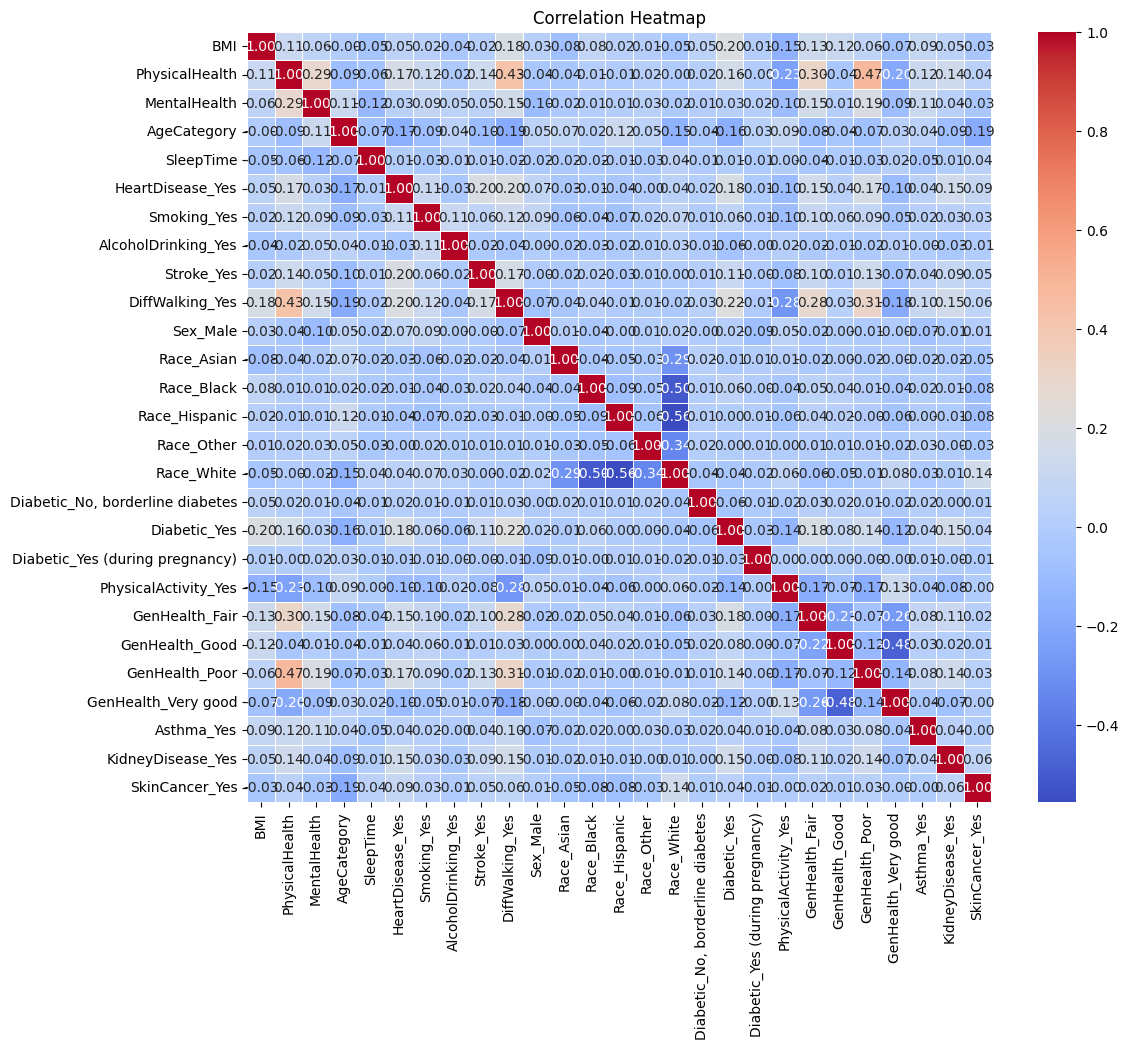

In [ ]:
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Train, Test, Split, Stratification & Scaling

In [ ]:
#test train split and stratify for age
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["AgeCategory"], random_state=55)

In [ ]:
#select features for x variable for training
X_train = train_set[["AgeCategory", "AlcoholDrinking_Yes", "Smoking_Yes","PhysicalActivity_Yes"]].values
#select features for y variable for traning
y_train = train_set['HeartDisease_Yes'].values
# correcting shape for error
yr_train = y_train.ravel()

# select features for x variable for tetsing
X_test = test_set[["AgeCategory", "AlcoholDrinking_Yes", "Smoking_Yes","PhysicalActivity_Yes"]].values
#select features for y variable for testing
y_test = test_set['HeartDisease_Yes'].values
# correcting shape for error
yr_test = y_test.ravel()

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Select features for X variable for training
X_train_age = train_set[["AgeCategory"]].values
X_train_alcohol = train_set[["AlcoholDrinking_Yes"]].values
X_train_smoking = train_set[["Smoking_Yes"]].values
X_train_physical_activity = train_set[["PhysicalActivity_Yes"]].values

# Select features for X variable for testing
X_test_age = test_set[["AgeCategory"]].values
X_test_alcohol = test_set[["AlcoholDrinking_Yes"]].values
X_test_smoking = test_set[["Smoking_Yes"]].values
X_test_physical_activity = test_set[["PhysicalActivity_Yes"]].values

# Scale the features one by one
scaler_age = StandardScaler()
scaler_alcohol = StandardScaler()
scaler_smoking = StandardScaler()
scaler_physical_activity = StandardScaler()

X_train_age_scaled = scaler_age.fit_transform(X_train_age)
X_train_alcohol_scaled = scaler_alcohol.fit_transform(X_train_alcohol)
X_train_smoking_scaled = scaler_smoking.fit_transform(X_train_smoking)
X_train_physical_activity_scaled = scaler_physical_activity.fit_transform(X_train_physical_activity)

X_test_age_scaled = scaler_age.transform(X_test_age)
X_test_alcohol_scaled = scaler_alcohol.transform(X_test_alcohol)
X_test_smoking_scaled = scaler_smoking.transform(X_test_smoking)
X_test_physical_activity_scaled = scaler_physical_activity.transform(X_test_physical_activity)

#Univariate Regressions

In [ ]:
from sklearn.metrics import accuracy_score
# new function
def model_acc(res):  # format of res should be predictions in column0, and actual in column1
    bad=0; good=0
    pred=res['pred']
    act= res['actual']
#    print(pred, act)
# need to keep track of good and bad predictions
    # print(len(pred))
    for i in range(len(pred)): # loop over all items
        if act[i] == pred[i]: # and if flower is virginica
          good=good+1  # keep track of success

    print("Your model made ", good/len(pred)*100, " percent correct predictions\n")
    return

Age

In [ ]:
log_reg_age = LogisticRegression(random_state=42, class_weight = 'balanced')
log_reg_age.fit(X_train_age, y_train)

y_train_pred_age = log_reg_age.predict(X_train_age_scaled)
y_test_pred_age = log_reg_age.predict(X_test_age_scaled)

train_accuracy_age = accuracy_score(y_train, y_train_pred_age)
test_accuracy_age = accuracy_score(y_test, y_test_pred_age)

print("Training Accuracy for Age:", train_accuracy_age)
print("Testing Accuracy for Age:", test_accuracy_age)

Training Accuracy for Age: 0.08592614018355509
Testing Accuracy for Age: 0.08427273722228303


In [ ]:
res = {'pred': y_train_pred_age, 'actual': yr_train}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  8.592614018355508  percent correct predictions



In [ ]:
res = {'pred': y_test_pred_age, 'actual': yr_test}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  8.427273722228303  percent correct predictions



In [ ]:
# Get coefficients
coefficients = log_reg_age.coef_

# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [[-0.21681242]]


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred_age)
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred_age)
print("\nConfusion Matrix for Testing Data:")
print(conf_matrix_test)

Confusion Matrix for Training Data:
[[     0 233853]
 [     0  21983]]

Confusion Matrix for Testing Data:
[[    0 58569]
 [    0  5390]]


In [ ]:
conf_matrix_test_age = confusion_matrix(y_test, y_test_pred_age)
target_accuracy_age = conf_matrix_test_age[1, 1] / (conf_matrix_test_age[1, 0] + conf_matrix_test_age[1, 1])
print("Target Level Accuracy for Age (Positive Class Accuracy):", target_accuracy_age)

Target Level Accuracy for Age (Positive Class Accuracy): 1.0


Alcohol

In [ ]:
log_reg_alc = LogisticRegression(random_state=42, class_weight = 'balanced')
log_reg_alc.fit(X_train_alcohol_scaled, y_train)

y_train_pred_alc = log_reg_alc.predict(X_train_alcohol_scaled)
y_test_pred_alc = log_reg_alc.predict(X_test_alcohol_scaled)

train_accuracy_alc = accuracy_score(y_train, y_train_pred_alc)
test_accuracy_alc = accuracy_score(y_test, y_test_pred_alc)

print("Training Accuracy for Alcohol:", train_accuracy_alc)
print("Testing Accuracy for Alcohol:", test_accuracy_alc)

Training Accuracy for Alcohol: 0.14678153191888554
Testing Accuracy for Alcohol: 0.14565581075376413


In [ ]:
res = {'pred': y_train_pred_alc, 'actual': yr_train}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  14.678153191888555  percent correct predictions



In [ ]:
res = {'pred': y_test_pred_alc, 'actual': yr_test}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  14.565581075376413  percent correct predictions



In [ ]:
# Get coefficients
coefficients = log_reg_alc.coef_

# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [[-0.14403523]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for training data
conf_matrix_train_alc = confusion_matrix(y_train, y_train_pred_alc)
print("Confusion Matrix for Training Data (Alcohol):")
print(conf_matrix_train_alc)

# Confusion matrix for testing data
conf_matrix_test_alc = confusion_matrix(y_test, y_test_pred_alc)
print("\nConfusion Matrix for Testing Data (Alcohol):")
print(conf_matrix_test_alc)

Confusion Matrix for Training Data (Alcohol):
[[ 16470 217383]
 [   901  21082]]

Confusion Matrix for Testing Data (Alcohol):
[[ 4166 54403]
 [  240  5150]]


In [ ]:
conf_matrix_test_alc = confusion_matrix(y_test, y_test_pred_alc)
target_accuracy_alc = conf_matrix_test_alc[1, 1] / (conf_matrix_test_alc[1, 0] + conf_matrix_test_alc[1, 1])
print("Target Level Accuracy for Alcohol (Positive Class Accuracy):", target_accuracy_alc)

Target Level Accuracy for Alcohol (Positive Class Accuracy): 0.9554730983302412


Smoking

In [ ]:
log_reg_smoking = LogisticRegression(random_state=42, class_weight = 'balanced')
log_reg_smoking.fit(X_train_smoking_scaled, y_train)

y_train_pred_smoking = log_reg_smoking.predict(X_train_smoking_scaled)
y_test_pred_smoking = log_reg_smoking.predict(X_test_smoking_scaled)

train_accuracy_smoking = accuracy_score(y_train, y_train_pred_smoking)
test_accuracy_smoking = accuracy_score(y_test, y_test_pred_smoking)

print("Training Accuracy for Age:", train_accuracy_smoking)
print("Testing Accuracy for Age:", test_accuracy_smoking)

Training Accuracy for Age: 0.6022764583561344
Testing Accuracy for Age: 0.6020106630810362


In [ ]:
res = {'pred': y_train_pred_smoking, 'actual': yr_train}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  60.227645835613444  percent correct predictions



In [ ]:
res = {'pred': y_test_pred_smoking, 'actual': yr_test}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  60.20106630810362  percent correct predictions



In [ ]:
# Get coefficients
coefficients = log_reg_smoking.coef_

# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [[0.37719292]]


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred_smoking)
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred_smoking)
print("\nConfusion Matrix for Testing Data:")
print(conf_matrix_test)

Confusion Matrix for Training Data:
[[141217  92636]
 [  9116  12867]]

Confusion Matrix for Testing Data:
[[35334 23235]
 [ 2220  3170]]


In [ ]:
conf_matrix_test_smoking = confusion_matrix(y_test, y_test_pred_smoking)

# Calculate target level accuracy
target_accuracy_smoking = conf_matrix_test_smoking[1, 1] / (conf_matrix_test_smoking[1, 0] + conf_matrix_test_smoking[1, 1])
print("Target Level Accuracy for Smoking (Positive Class Accuracy):", target_accuracy_smoking)

Target Level Accuracy for Smoking (Positive Class Accuracy): 0.588126159554731


Physical Activity

In [ ]:
log_reg_phys = LogisticRegression(random_state=42, class_weight = 'balanced')
log_reg_phys.fit(X_train_physical_activity_scaled, y_train)

y_train_pred_phys = log_reg_phys.predict(X_train_physical_activity_scaled)
y_test_pred_phys = log_reg_phys.predict(X_test_physical_activity_scaled)

train_accuracy_phys = accuracy_score(y_train, y_train_pred_phys)
test_accuracy_phys = accuracy_score(y_test, y_test_pred_phys)

print("Training Accuracy for Age:", train_accuracy_phys)
print("Testing Accuracy for Age:", test_accuracy_phys)

Training Accuracy for Age: 0.7510905423787113
Testing Accuracy for Age: 0.7535452399193233


In [ ]:
res = {'pred': y_train_pred_phys, 'actual': yr_train}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  75.10905423787113  percent correct predictions



In [ ]:
res = {'pred': y_test_pred_phys, 'actual': yr_test}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Your model made  75.35452399193233  percent correct predictions



In [ ]:
# Get coefficients
coefficients = log_reg_phys.coef_

# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [[-0.30574274]]


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred_phys)
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred_phys)
print("\nConfusion Matrix for Testing Data:")
print(conf_matrix_test)

Confusion Matrix for Training Data:
[[184266  49587]
 [ 14093   7890]]

Confusion Matrix for Testing Data:
[[46202 12367]
 [ 3396  1994]]


In [ ]:
conf_matrix_test_phys = confusion_matrix(y_test, y_test_pred_phys)

# Calculate target level accuracy
target_accuracy_phys = conf_matrix_test_phys[1, 1] / (conf_matrix_test_phys[1, 0] + conf_matrix_test_phys[1, 1])
print("Target Level Accuracy for Physical Activity (Positive Class Accuracy):", target_accuracy_phys)


Target Level Accuracy for Physical Activity (Positive Class Accuracy): 0.3699443413729128


#Multivariate Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# new function

def model_acc(res):  # format of res should be predictions in column0, and actual in column1
    bad=0; good=0
    pred=res['pred']
    act= res['actual']

    print(pred, act)

# need to keep track of good and bad predictions

    print(len(pred))

    for i in range(len(pred)): # loop over all items
        if act[i] == pred[i]: # and if flower is virginica
          good=good+1  # keep track of success



    print("Your model made ", good/len(pred)*100, " percent correct predictions\n")
    return

In [ ]:






log_reg_all = LogisticRegression(random_state=42, class_weight = 'balanced')
#fit regression to training and training data
log_reg_all.fit(X_train_scaled, yr_train)
# Make predictions on the training set
train_preds = log_reg_all.predict(X_train_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(yr_train, train_preds)
print("Training Accuracy:", train_accuracy)

#cross validation for training data
cv_scores = cross_val_score(log_reg_all, X_train_scaled, yr_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores (Accuracy):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

#compute model accuracy for training set
res = {'pred': train_preds, 'actual': yr_train}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Training Accuracy: 0.6192678121921856
Cross-Validation Scores (Accuracy): [0.6193324  0.61835522 0.61530644 0.61018605 0.6181207  0.61944966
 0.62224915 0.62221006 0.61071805 0.62150647]
Mean Accuracy: 0.6177434204336121
0          True
1          True
2         False
3         False
4         False
          ...  
255831     True
255832    False
255833    False
255834    False
255835    False
Name: pred, Length: 255836, dtype: bool 0         False
1         False
2         False
3         False
4         False
          ...  
255831    False
255832    False
255833    False
255834    False
255835    False
Name: actual, Length: 255836, dtype: bool
255836
Your model made  61.92678121921856  percent correct predictions



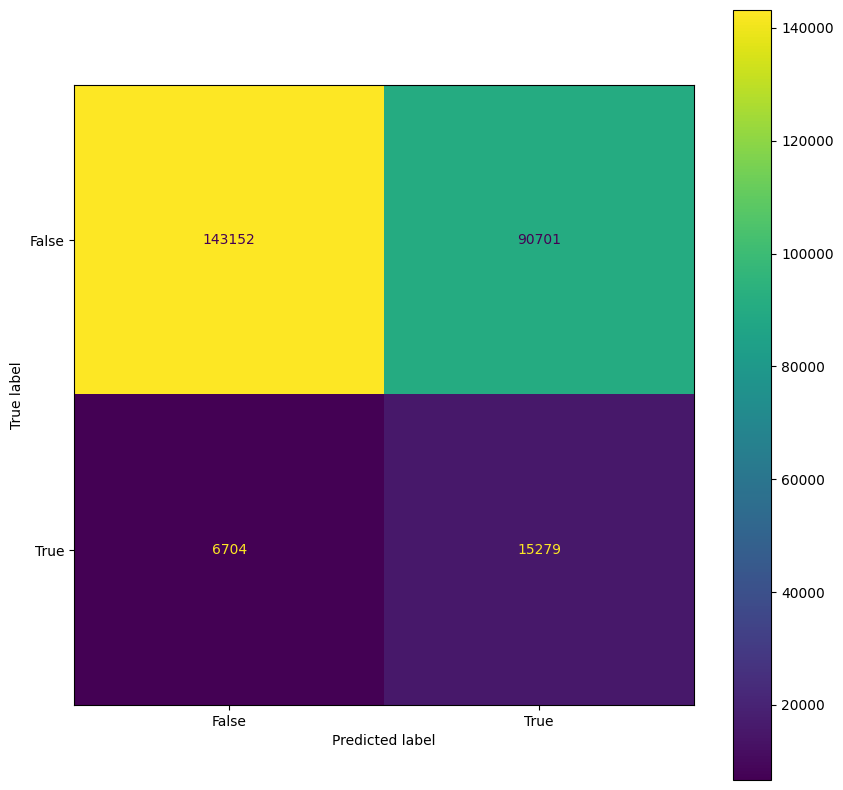

In [ ]:
#create a confusion matrix for the training set
plt.close('all')
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, ax=ax)

In [ ]:
#import functions
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

# calculate the precision, recall, and f1 scores for training set
prec_train = precision_score(yr_train, train_preds, average=None)
rec_train = recall_score(yr_train, train_preds, average=None)
# check F1 score
f1_train = f1_score(yr_train, train_preds, average=None)

print("precision:\t", prec_train)
print("\nrecall:\t", rec_train)
print("\nf1:\t", f1_train)

precision:	 [0.95526372 0.14416871]

recall:	 [0.61214524 0.69503707]

f1:	 [0.74614877 0.2388034 ]


In [ ]:
log_reg = LogisticRegression(random_state=42, class_weight = 'balanced')
#fit regression to training and testing data
log_reg.fit(X_test_scaled, yr_test)
# Make predictions on the testing set
test_preds = log_reg.predict(X_test_scaled)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(yr_test, test_preds)
print("Testing Accuracy:", test_accuracy)

#cross validation for testing data
cv_scores = cross_val_score(log_reg, X_test_scaled, yr_test, cv=10, scoring='accuracy')
print("Cross-Validation Scores (Accuracy):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

#compute model accuracy for testing set
res = {'pred': test_preds, 'actual': yr_test}
res_df = pd.DataFrame(data=res)
model_acc(res_df)

Testing Accuracy: 0.6122672336965869
Cross-Validation Scores (Accuracy): [0.61835522 0.60428393 0.61538462 0.60631645 0.60709819 0.61225766
 0.61022514 0.61741714 0.61116323 0.61407349]
Mean Accuracy: 0.6116575058395078
0        False
1        False
2        False
3        False
4         True
         ...  
63954    False
63955     True
63956    False
63957     True
63958    False
Name: pred, Length: 63959, dtype: bool 0        False
1        False
2        False
3        False
4         True
         ...  
63954    False
63955    False
63956    False
63957    False
63958    False
Name: actual, Length: 63959, dtype: bool
63959
Your model made  61.226723369658686  percent correct predictions



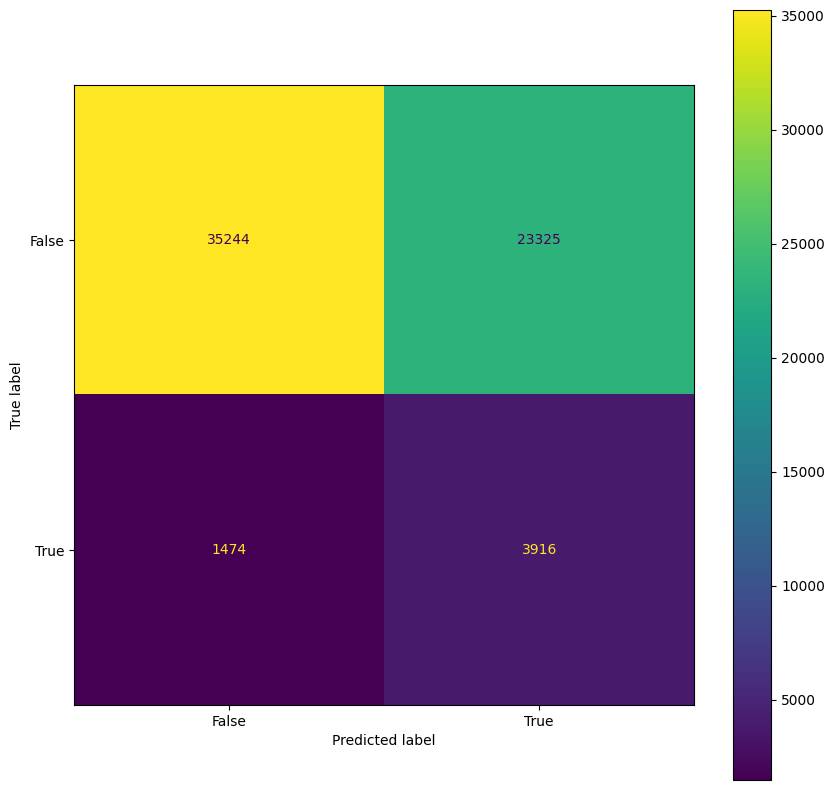

In [ ]:
#create a confusion matrix for the training set
plt.close('all')
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, ax=ax)

In [ ]:
#import functions
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

# calculate the precision, recall, and f1 scores for training set
prec_test = precision_score(yr_test, test_preds, average=None)
rec_test = recall_score(yr_test, test_preds, average=None)
# check F1 score
f1_test = f1_score(yr_test, test_preds, average=None)

print("precision:\t", prec_test)
print("\nrecall:\t", rec_test)
print("\nf1:\t", f1_test)

precision:	 [0.9598562 0.1437539]

recall:	 [0.60175178 0.72653061]

f1:	 [0.73974414 0.24001716]


#SVM

In [ ]:
X_train_resampled, yr_train_resampled = resample(X_train_scaled, yr_train, n_samples=1000, random_state=42) #resampling to address imbalance in train set
class_weights_resampled = class_weight.compute_class_weight('balanced', classes=np.unique(yr_train_resampled), y=yr_train_resampled)
#using class weights to penalize errors
poly_kernel_svm_clf_weighted_resampled = make_pipeline(StandardScaler(), #creating pipeline
                                                       SVC(kernel="poly", degree=3, coef0=1, C=5, class_weight={0: class_weights_resampled[0],
                                                                                                                1: class_weights_resampled[1]}))
poly_kernel_svm_clf_weighted_resampled.fit(X_train_resampled, yr_train_resampled)#fitting model using pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=5,
                     class_weight={0: 0.5488474204171241, 1: 5.617977528089888},
                     coef0=1, kernel='poly'))])

In [ ]:
poly_svm_train_predictions_resampled = poly_kernel_svm_clf_weighted_resampled.predict(X_train_resampled)#make predictions

print("Validation vs training: Model accuracy, precision, recall, f1, and support")
print("Model accuracy on training data:\t", poly_kernel_svm_clf_weighted_resampled.score(X_train_resampled, yr_train_resampled))
#using score method to find accuracy, precision, recall, F1, support scores
prec, rec, fscore, supp = precision_recall_fscore_support(yr_train_resampled, poly_svm_train_predictions_resampled, average=None)
print("Precision:\t", prec.round(3), "\nRecall:\t\t", rec.round(3),
      "\nFscore:\t\t", fscore.round(3), "\nSupport:\t", supp.round(3))

conf_matrix = confusion_matrix(yr_train_resampled, poly_svm_train_predictions_resampled)#finding and printing confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

Validation vs training: Model accuracy, precision, recall, f1, and support
Model accuracy on training data:	 0.557
Precision:	 [0.961 0.14 ] 
Recall:		 [0.536 0.775] 
Fscore:		 [0.688 0.238] 
Support:	 [911  89]

Confusion Matrix:
[[488 423]
 [ 20  69]]


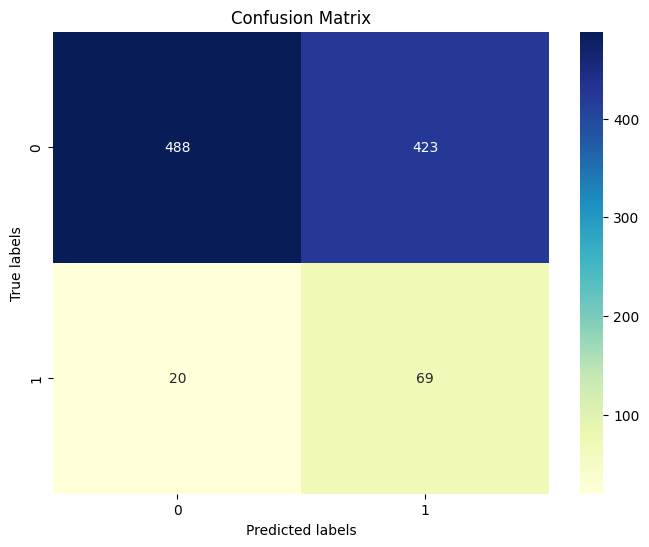

In [ ]:
plt.figure(figsize=(8, 6))#visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_scores = cross_val_score(poly_kernel_svm_clf_weighted_resampled, X_train_resampled, yr_train_resampled, cv=10, scoring='accuracy')
print("Cross-validation accuracy scores:", accuracy_scores)#doing cross validation on accuracy scores

Cross-validation accuracy scores: [0.63 0.61 0.54 0.51 0.58 0.62 0.55 0.6  0.49 0.49]


In [ ]:
mean_accuracy = accuracy_scores.mean()#mean accuracy score of the cross validation
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.562


In [ ]:
X_test_resampled, yr_test_resampled = resample(X_test_scaled, yr_test, n_samples=1000, random_state=42) #resampling to address imbalance in test set
class_weights_resampled = class_weight.compute_class_weight('balanced', classes=np.unique(yr_test_resampled), y=yr_test_resampled)
#using class weights to penalize errors
poly_svm_test_predictions_resampled = poly_kernel_svm_clf_weighted_resampled.predict(X_test_resampled)  # Make predictions on testing data

print("Validation vs testing: Model accuracy, precision, recall, f1, and support")
print("Model accuracy on testing data:\t", poly_kernel_svm_clf_weighted_resampled.score(X_test_resampled, yr_test_resampled))

# Using score method to find accuracy, precision, recall, F1, support scores
prec, rec, fscore, supp = precision_recall_fscore_support(yr_test_resampled, poly_svm_test_predictions_resampled, average=None)
print("Precision:\t", prec.round(3), "\nRecall:\t\t", rec.round(3),
      "\nFscore:\t\t", fscore.round(3), "\nSupport:\t", supp.round(3))

conf_matrix = confusion_matrix(yr_test_resampled, poly_svm_test_predictions_resampled)  # Finding and printing confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

Validation vs testing: Model accuracy, precision, recall, f1, and support
Model accuracy on testing data:	 0.547
Precision:	 [0.953 0.128] 
Recall:		 [0.53  0.724] 
Fscore:		 [0.681 0.218] 
Support:	 [913  87]

Confusion Matrix:
[[484 429]
 [ 24  63]]


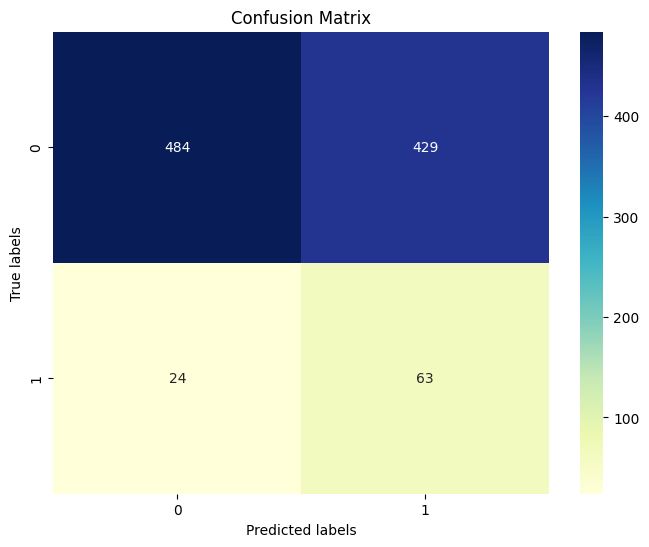

In [ ]:

plt.figure(figsize=(8, 6))#visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy_scores = cross_val_score(poly_kernel_svm_clf_weighted_resampled, X_test_resampled, yr_test_resampled, cv=10, scoring='accuracy')
print("Cross-validation accuracy scores:", accuracy_scores)#doing cross validation on accuracy scores

Cross-validation accuracy scores: [0.36 0.46 0.53 0.49 0.33 0.48 0.5  0.41 0.48 0.62]


In [ ]:
mean_accuracy = accuracy_scores.mean()#mean accuracy score of the cross validation
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.466


#Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
#Combine scaled features into X_train and X_test
X_train = pd.concat([
    pd.DataFrame(X_train_age_scaled, columns=['AgeCategory']),
    pd.DataFrame(X_train_alcohol_scaled, columns=['AlcoholDrinking_Yes']),
    pd.DataFrame(X_train_smoking_scaled, columns=['Smoking_Yes']),
    pd.DataFrame(X_train_physical_activity_scaled, columns=['PhysicalActivity_Yes'])
], axis=1)

X_test = pd.concat([
    pd.DataFrame(X_test_age_scaled, columns=['AgeCategory']),
    pd.DataFrame(X_test_alcohol_scaled, columns=['AlcoholDrinking_Yes']),
    pd.DataFrame(X_test_smoking_scaled, columns=['Smoking_Yes']),
    pd.DataFrame(X_test_physical_activity_scaled, columns=['PhysicalActivity_Yes'])
], axis=1)

In [ ]:
# Select target variable for training and testing
y_train = train_set['HeartDisease_Yes'].values
y_test = test_set['HeartDisease_Yes'].values

In [ ]:
# Create decision tree classifier with max_depth=20
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42, class_weight='balanced')

# Fit the classifier
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

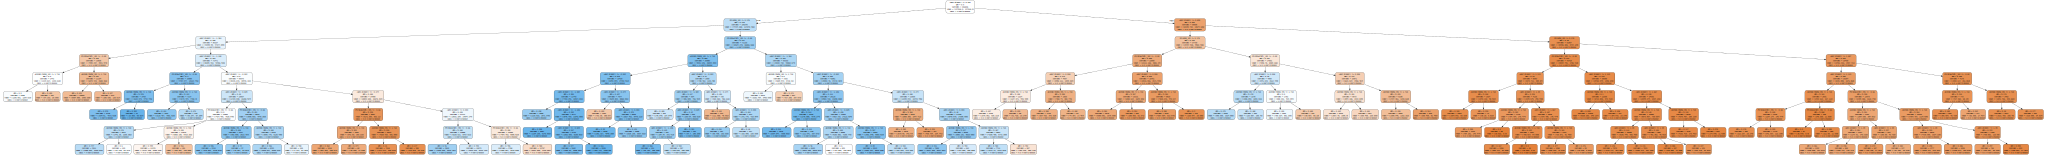

In [ ]:
# Save decision tree visualization to a .dot file
export_graphviz(
    tree_clf,
    out_file="heart_disease_tree.dot",  # outputs to local directory
    feature_names=X_train.columns,
    class_names=["No HeartDisease", "HeartDisease"],
    rounded=True,
    filled=True,
)

# Display the decision tree
Source.from_file("heart_disease_tree.dot")

A node is "pure" (gini = 0) if all all instances it applies to belong to the same class. So, a leaf node with 100% correct predictions will have a gini impurity = 0

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def class_performance(xdata, ydata, model):
    # Classifiers with the score method output accuracy by default
    predy = model.predict(xdata)
    acc = accuracy_score(predy, ydata)
    prec, rec, fscore, _ = precision_recall_fscore_support(ydata, predy, average=None, zero_division=0)

    print("\nModel accuracy on supplied data:", round(acc, 3))
    print("Precision:", prec.round(3))
    print("Recall:", rec.round(3))
    print("F1 Score:", fscore.round(3))


    print("Precision:\t", prec.round(3), "\nRecall:\t\t", rec.round(3), "\nFscore:\t\t", fscore.round(3), "\nSupport:\t", supp)
    plt.close('all')
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay.from_predictions(ydata, predy, ax=ax)



Model accuracy on supplied data: 0.633
Precision: [0.969 0.163]
Recall: [0.619 0.792]
F1 Score: [0.755 0.271]
Precision:	 [0.969 0.163] 
Recall:		 [0.619 0.792] 
Fscore:		 [0.755 0.271] 
Support:	 [913  87]


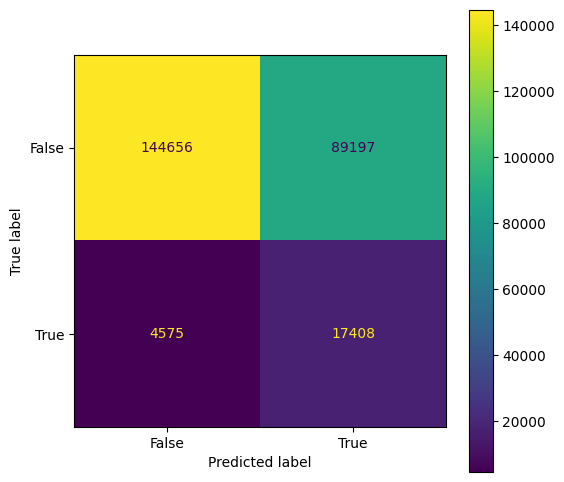

In [ ]:
# Evaluate class-level performance for the decision tree classifier on training data
class_performance(X_train, y_train, tree_clf)

#The first values are for No HeartDisease and the second values are for HeartDisease

#Top left : True Positive (correctly classified has having No Heart Disease)
#Top right: False Positive (incorrectly classified has negative (NHD) when they were actually positive (HD))
#Bottom Left: False Negative (incorrectly classified as positive (HD)but actually negative (NHD))
#Bottom right: True Negative (correctly classified as positive (HD))


Model accuracy on supplied data: 0.635
Precision: [0.971 0.162]
Recall: [0.62  0.801]
F1 Score: [0.756 0.27 ]
Precision:	 [0.971 0.162] 
Recall:		 [0.62  0.801] 
Fscore:		 [0.756 0.27 ] 
Support:	 [913  87]


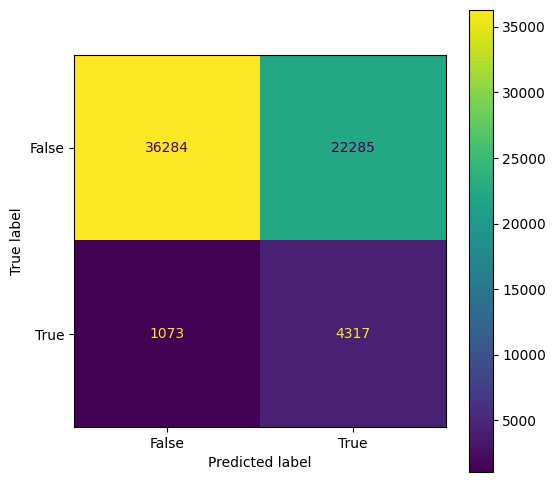

In [ ]:
#Evaluate class-level performance for the decision tree classifier on test data
class_performance(X_test, y_test, tree_clf)


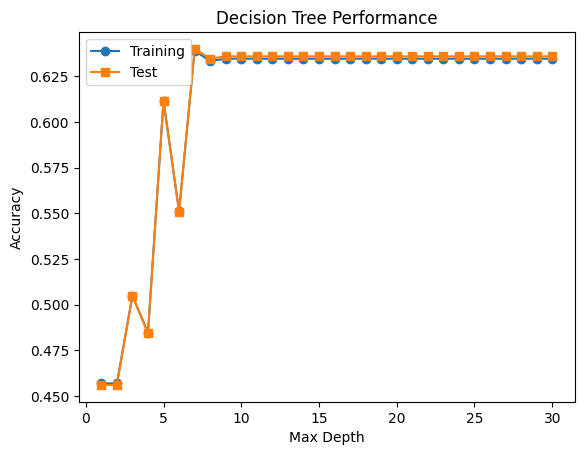

In [ ]:
#Below I've written a loop that will run over 30 levels of a decision
# tree classifier, training a model on each of the 3 data sets

# Define the depths to explore
depths = np.linspace(1, 30, 30, dtype=int)

# Initialize lists to store accuracy scores
acc_train = []
acc_test = []

# Loop over depths
for depth in depths:
    # Create decision tree classifiers with a given depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight='balanced')

    # Train the model
    tree_clf.fit(X_train, y_train)

    # Evaluate accuracy on training data
    acc_train.append(tree_clf.score(X_train, y_train))

    # Evaluate accuracy on test data
    acc_test.append(tree_clf.score(X_test, y_test))

# Plotting
plt.close('all')
plt.plot(depths, acc_train, '-o', label="Training")
plt.plot(depths, acc_test, '-s', label="Test")
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Performance")
plt.show()


# Conclusions and Limitations

Conclusions:
*   we better understand the effects of lifestyle choices and behaviors on heart disease. Overall, our models did not perform as well as we expected
*  there was an inverse relationship with alcohol, physicial activity and age with heart disease, and there was a positive relationship with smoking
*   The SVM model performed moderately well and is relatively effective when classifying whether an individual has heart disease or not
*   The decision tree is helpful in that you can follow a branch to see if a particular variable can predict heart disease well or not, but it is a complex and large visual


Limitations & Future Improvements:
*   Limited samples of those with heart disease
*   Some omitted variables such as sleep, mental health, heart disease history, or body mass index (BMI) which could improve variance and accuracy of the models. We would aim to incorporate more health or demographic factors such as stroke, race, or cholesterol
*   The SVM model does a significantly better job at identifying individuals without heart disease than individuals with heart disease. It may be interesting to alter the parameters (kernel, C, or polynomial degree) or the number of samples that are used when fitting the model as this particular study only used 1000 for the SVM model



